In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron

In [3]:
# Reading the training dataset in a dataframe using Pandas
ani_class = pd.read_csv("class.csv")

# Reading the test dataset in a dataframe using Pandas
animal = pd.read_csv("zoo.csv")

In [4]:
ani_class.head()

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"


In [5]:
animal.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [6]:
# Checking the shape of the loaded dataset
print("Shape of the Class Dataset is",ani_class.shape)
print(" ")
print("Shape of the Zoo Dataset is",animal.shape)

Shape of the Class Dataset is (7, 4)
 
Shape of the Zoo Dataset is (101, 18)


In [7]:
ani_class.describe()

,Class_Number,Number_Of_Animal_Species_In_Class
count,7.000000,7.000000
mean,4.000000,14.428571
std,2.160247,12.895182
min,1.000000,4.000000
25%,2.500000,6.500000
50%,4.000000,10.000000
75%,5.500000,16.500000
max,7.000000,41.000000


In [8]:
ani_class.info

<bound method DataFrame.info of    Class_Number  Number_Of_Animal_Species_In_Class    Class_Type  \
0             1                                 41        Mammal   
1             2                                 20          Bird   
2             3                                  5       Reptile   
3             4                                 13          Fish   
4             5                                  4     Amphibian   
5             6                                  8           Bug   
6             7                                 10  Invertebrate   

                                        Animal_Names  
0  aardvark, antelope, bear, boar, buffalo, calf,...  
1  chicken, crow, dove, duck, flamingo, gull, haw...  
2    pitviper, seasnake, slowworm, tortoise, tuatara  
3  bass, carp, catfish, chub, dogfish, haddock, h...  
4                             frog, frog, newt, toad  
5  flea, gnat, honeybee, housefly, ladybird, moth...  
6  clam, crab, crayfish, lobster, octo

In [9]:
ani_class.describe()

,Class_Number,Number_Of_Animal_Species_In_Class
count,7.000000,7.000000
mean,4.000000,14.428571
std,2.160247,12.895182
min,1.000000,4.000000
25%,2.500000,6.500000
50%,4.000000,10.000000
75%,5.500000,16.500000
max,7.000000,41.000000


In [10]:
ani_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Class_Number                       7 non-null      int64 
 1   Number_Of_Animal_Species_In_Class  7 non-null      int64 
 2   Class_Type                         7 non-null      object
 3   Animal_Names                       7 non-null      object
dtypes: int64(2), object(2)
memory usage: 352.0+ bytes


In [11]:
animal.isnull().sum()

animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
class_type     0
dtype: int64

In [12]:
ani_class.isnull().sum()

Class_Number                         0
Number_Of_Animal_Species_In_Class    0
Class_Type                           0
Animal_Names                         0
dtype: int64

In [13]:
# Check if class_type has correct values
print(animal.class_type.unique())

[1 4 2 7 6 5 3]


In [14]:
# Animal with 5 legs
animal.loc[animal['legs']  == 5]

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
85,starfish,0,0,1,0,0,1,1,0,0,0,0,0,5,0,0,0,7


<AxesSubplot: xlabel='class_type', ylabel='Count'>

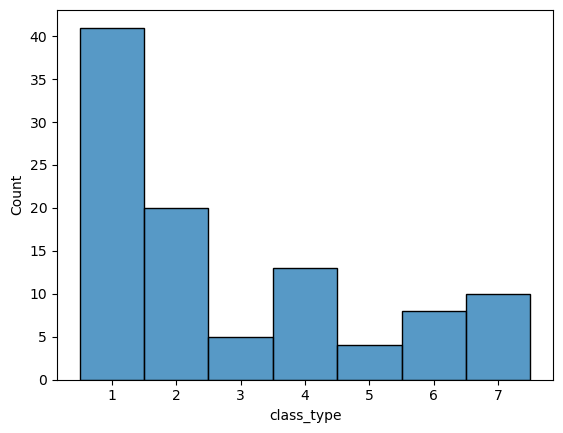

In [22]:
sns.histplot(data = animal, x = 'class_type',stat = "count", discrete = True)

In [24]:
class_type = animal.class_type

In [32]:
X = animal.iloc[:,1:17]
y = class_type
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 1)
X.head()
y.head()

0    1
1    1
2    4
3    1
4    1
Name: class_type, dtype: int64

In [33]:
import warnings
warnings.filterwarnings("ignore")
model1 = Perceptron(eta0=1.0,random_state = 1)
model1.fit(train_X, train_y)

Perceptron(random_state=1)

In [34]:
prediction1 = model1.predict(X_test)

In [35]:
Y_true = y_test.to_numpy().flatten()
print(prediction1)
print(Y_true)

[1 2 1 2 1 7 1 2 4 5 2 1 1 1 1 1 1 1 7 3 2 1 6 6 4 7 6 1 4 1 1]
[1 2 1 2 1 7 1 2 4 5 2 1 1 1 1 1 1 1 7 3 2 1 6 6 4 7 6 1 4 1 1]


In [36]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [37]:
confusion_matrix(Y_true, prediction1)

array([[15,  0,  0,  0,  0,  0,  0],
       [ 0,  5,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  3,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  3,  0],
       [ 0,  0,  0,  0,  0,  0,  3]], dtype=int64)

In [41]:
accuracy_score(Y_true, prediction1)

1.0

In [42]:
precision_score(Y_true, prediction1, average = 'micro')

1.0

In [43]:
f1_score(Y_true, prediction1, average = 'micro')

1.0

In [44]:
recall_score(Y_true, prediction1, average = 'micro')

1.0